In [1]:
import xgboost
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Run Sequential feature selector for random forest

In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/PNI_001_cleaned.csv")

X = df.drop(['ID','PNI'],axis =1).values
y = df['PNI'].values

In [5]:
clf = RandomForestClassifier(n_estimators=100,
    max_depth=25,
    min_samples_leaf=3,
    verbose=0,
    random_state = 180)

In [6]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 180)

In [7]:
sfs1 = SequentialFeatureSelector(clf, 
           k_features=40, 
           forward=True, 
           verbose=2,
           scoring='roc_auc',
           cv=cv,
           n_jobs = 4)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   11.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   47.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 1030 out of 1030 | elapsed:  5.3min finished

[2020-06-08 20:04:52] Features: 1/40 -- score: 0.6480147076215956[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   46.6s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 1029 out of 1029 | elapsed:  4.6min finished

[2020-06-08 20:09:28] Featu

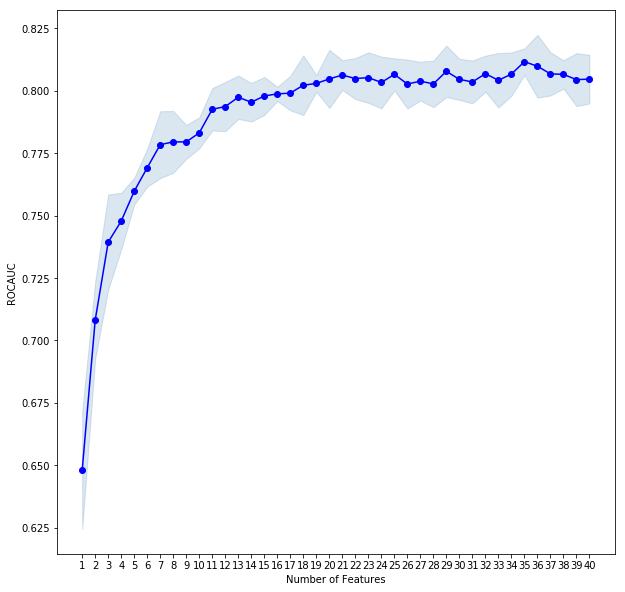

In [9]:
f = plot_sequential_feature_selection(sfs1.get_metric_dict(), figsize = (10,10),ylabel = 'ROCAUC')
plt.savefig('results/pni_sfs.png')

In [10]:
output_dict = sfs1.get_metric_dict()

In [11]:
df_output = pd.DataFrame(output_dict).T
df_output.to_csv('results/sfs/resuls_pni_sfs.csv')

In [12]:
from joblib import dump, load
dump(sfs1, 'results/sfs/sfs_40_pni.joblib') 

['results/sfs/sfs_40_pni.joblib']

In [13]:
X_df = df.drop(['ID','PNI'],axis =1)
total_cols = list(X_df.columns)

In [14]:
for key,value in output_dict.items():
    col_name = [total_cols[idx] for idx in value['feature_idx']]
    roc_auc =value['avg_score']
    print(f'{key} - auc = {roc_auc:.3f} - {col_name}')

1 - auc = 0.648 - ['ANKUB1']
2 - auc = 0.708 - ['ANKUB1', 'SRGN']
3 - auc = 0.739 - ['ANKUB1', 'CNOT6', 'SRGN']
4 - auc = 0.748 - ['ANKUB1', 'CNOT6', 'SRGN', 'TNFAIP3']
5 - auc = 0.760 - ['ANKUB1', 'CNOT6', 'SRGN', 'TNFAIP3', 'TSPAN8']
6 - auc = 0.769 - ['ANKUB1', 'CFAP73', 'CNOT6', 'SRGN', 'TNFAIP3', 'TSPAN8']
7 - auc = 0.778 - ['ANKUB1', 'CFAP73', 'CNOT6', 'METTL15', 'SRGN', 'TNFAIP3', 'TSPAN8']
8 - auc = 0.780 - ['ANKUB1', 'CFAP73', 'CNGA4', 'CNOT6', 'METTL15', 'SRGN', 'TNFAIP3', 'TSPAN8']
9 - auc = 0.780 - ['ANKUB1', 'CFAP73', 'CNGA4', 'CNOT6', 'HSPA4L', 'METTL15', 'SRGN', 'TNFAIP3', 'TSPAN8']
10 - auc = 0.783 - ['ANKUB1', 'C4orf45', 'CFAP73', 'CNGA4', 'CNOT6', 'HSPA4L', 'METTL15', 'SRGN', 'TNFAIP3', 'TSPAN8']
11 - auc = 0.793 - ['ANKUB1', 'ASPG', 'C4orf45', 'CFAP73', 'CNGA4', 'CNOT6', 'HSPA4L', 'METTL15', 'SRGN', 'TNFAIP3', 'TSPAN8']
12 - auc = 0.794 - ['ANKUB1', 'ASPG', 'C4orf45', 'CFAP73', 'CNGA4', 'CNOT6', 'HSP90B1', 'HSPA4L', 'METTL15', 'SRGN', 'TNFAIP3', 'TSPAN8']
13 - auc = 

In [20]:
features_number = []
auc_scores = []
for key,value in output_dict.items():
    auc_scores.append(value['avg_score'])

In [24]:
df_results = pd.DataFrame({'feature_number':np.arange(1,41),'avg_score':auc_scores})
df_results['avg_score_difference'] = df_results['avg_score'].diff()

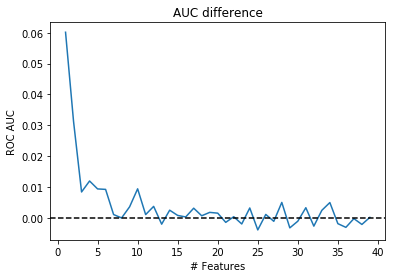

In [31]:
plt.plot(df_results['avg_score_difference'])
plt.axhline(0,color = 'black', ls = '--')
plt.title('AUC difference')
plt.xlabel('# Features')
plt.ylabel('ROC AUC')
plt.savefig('results/sfs/pni_auc_difference.png')